### Task 4 : Sentiment Analysis

In [ ]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

 Step 1: Load and Explore the Data

In [ ]:
# Load your CSV file with reviews
df = pd.read_csv("Reviews.csv")  # Make sure your CSV has a column 'review'

df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [ ]:
# Preview important columns
df[["Score", "Summary", "Text"]].head()

,Score,Summary,Text
0,5,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,4,"""Delight"" says it all",This is a confection that has been around a fe...
3,2,Cough Medicine,If you are looking for the secret ingredient i...
4,5,Great taffy,Great taffy at a great price. There was a wid...


Step 2: Preprocessing the Data


In [ ]:
df.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [ ]:
# Drop rows with missing reviews
df = df.dropna(subset=["Text"])

In [ ]:
# Filter to only relevant scores (1–5)
df = df[df["Score"].isin([1, 2, 3, 4, 5])]

Step 3: Classify Reviews Based on Score

In [ ]:
def label_sentiment(score):
    if score <= 2:
        return "Negative"
    elif score == 3:
        return "Neutral"
    else:
        return "Postive"
    
df["Sentiment"] = df["Score"].apply(label_sentiment)
df[["Text", "Sentiment"]].head()

,Text,Sentiment
0,I have bought several of the Vitality canned d...,Postive
1,Product arrived labeled as Jumbo Salted Peanut...,Negative
2,This is a confection that has been around a fe...,Postive
3,If you are looking for the secret ingredient i...,Negative
4,Great taffy at a great price. There was a wid...,Postive


Step 4: Assign Sentiment Label

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize the analyzer
analyzer = SentimentIntensityAnalyzer()

# Sample review
text = "This is a fantastic product! I loved it."

# Get sentiment scores
score = analyzer.polarity_scores(text)

# Print result
print(score)


{'neg': 0.0, 'neu': 0.435, 'pos': 0.565, 'compound': 0.8313}


In [ ]:
def get_sentiment(compound):
    if compound >= 0.05:
        return "Positive"
    elif compound <= -0.05:
        return "Negative"
    else:
        return "Neutral"

sentiment = get_sentiment(score["compound"])
print("Sentiment:", sentiment)

Sentiment: Positive


Step 5: Visualize Sentiment Distribution

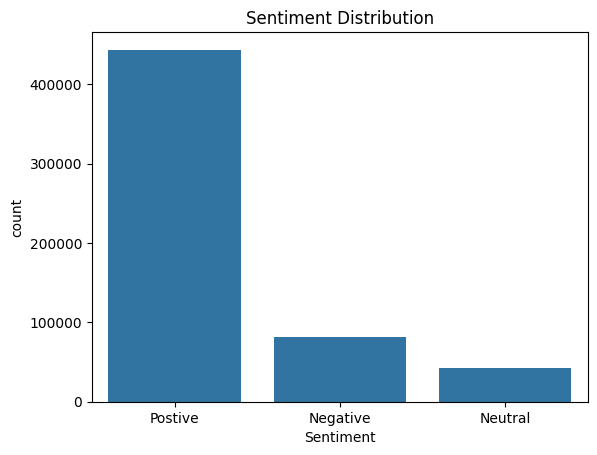

In [ ]:
# Plot sentiment distribution
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="Sentiment", data=df)
plt.title("Sentiment Distribution")
plt.show()

Step 6: Export & Submit

In [ ]:
df[["Text","Score"]].head(1000).to_csv("sentiment_results.csv", index=False)